In [2]:
import cv2

No of Channel is: 3
No of Channel is: 3


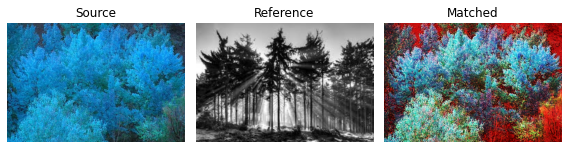

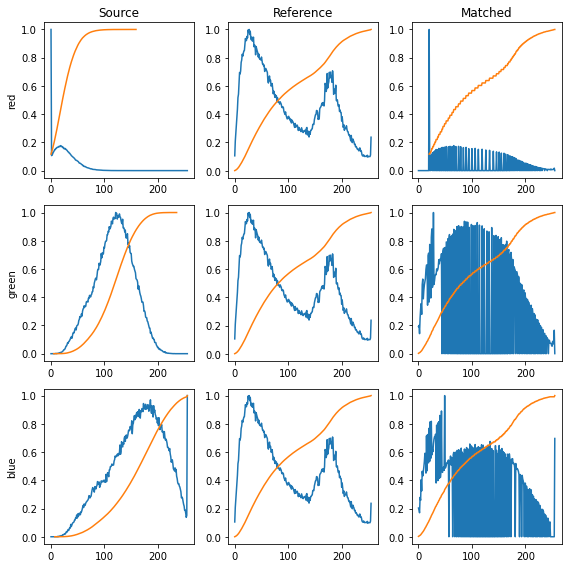

In [34]:
# import packages 
import matplotlib.pyplot as plt 
from skimage import exposure 
from skimage.exposure import match_histograms 
import cv2 

img1 = cv2.imread("source.jpg") 
 
print('No of Channel is: ' + str(img1.ndim)) 

# reading reference image 
img = cv2.imread("ref.jpg") 
img2= cv2.resize(reference, (img1.shape[1], img1.shape[0]))

# checking the number of channels 
print('No of Channel is: ' + str(img2.ndim)) 

image = img1 
reference = img2 

matched = match_histograms(image, reference , 
						multichannel=True) 


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, 
									figsize=(8, 3), 
									sharex=True, sharey=True) 

for aa in (ax1, ax2, ax3): 
	aa.set_axis_off() 

ax1.imshow(image) 
ax1.set_title('Source') 
ax2.imshow(reference) 
ax2.set_title('Reference') 
ax3.imshow(matched) 
ax3.set_title('Matched') 

plt.tight_layout() 
plt.show() 

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8)) 

for i, img in enumerate((image, reference, matched)): 
	for c, c_color in enumerate(('red', 'green', 'blue')): 
		img_hist, bins = exposure.histogram(img[..., c], 
											source_range='dtype') 
		axes[c, i].plot(bins, img_hist / img_hist.max()) 
		img_cdf, bins = exposure.cumulative_distribution(img[..., c]) 
		axes[c, i].plot(bins, img_cdf) 
		axes[c, 0].set_ylabel(c_color) 

axes[0, 0].set_title('Source') 
axes[0, 1].set_title('Reference') 
axes[0, 2].set_title('Matched') 

plt.tight_layout() 
plt.show() 


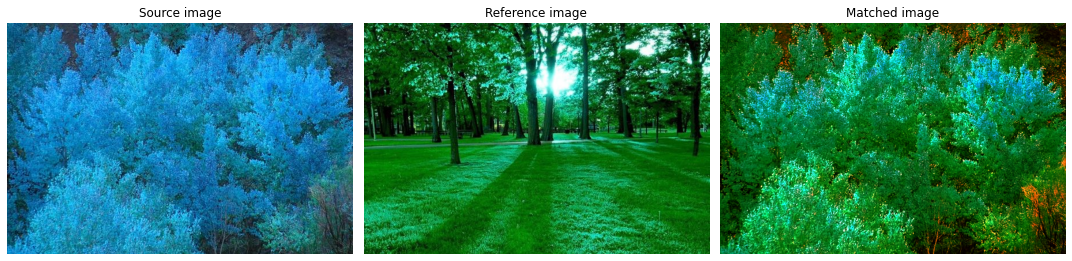

In [27]:
# importing packages 
import matplotlib.pyplot as plt 
from skimage.exposure import match_histograms 
import cv2

# loading data 
reference = cv2.imread('reference.jpg')
image = cv2.imread('source.jpg')

# matching histograms 
matched = match_histograms(image, reference, 
						multichannel=True,) 

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, 
									ncols=3, 
									figsize=(15, 5), 
									sharex=True, 
									sharey=True) 
for aa in (ax1, ax2, ax3): 
	aa.set_axis_off() 

# displaying images 
ax1.imshow(image) 
ax1.set_title('Source image') 
ax2.imshow(reference) 
ax2.set_title('Reference image') 
ax3.imshow(matched) 
ax3.set_title('Matched image') 

plt.tight_layout() 
plt.show() 

# Applying mask to histogram matching 



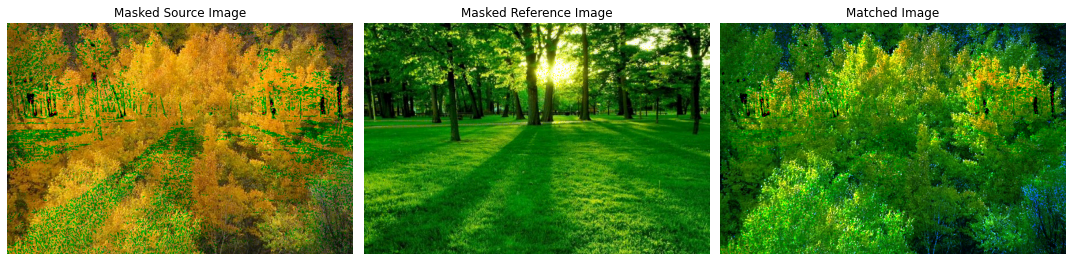

In [28]:

import matplotlib.pyplot as plt 
from skimage.exposure import match_histograms 
import cv2
import numpy as np

# Loading images
reference = cv2.imread('reference.jpg')
image = cv2.imread('source.jpg')

# Resize images to have the same shape (resize reference to match image)
reference_resized = cv2.resize(reference, (image.shape[1], image.shape[0]))

# Creating a mask (you can define this mask based on some condition)
# Here, I'm using a simple mask that selects the region where both images have values above 100 (you can change this mask to suit your needs)
mask = (image > 5) & (reference_resized > 5)

# Applying the mask to the images
masked_image = np.where(mask, image, 0)  # Apply mask to source image
masked_reference = np.where(mask, reference_resized, 0)  # Apply mask to reference image

# Matching histograms on the masked images
matched = match_histograms(masked_image, masked_reference, multichannel=True)

# Plotting the images
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

# Displaying images
ax1.imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for displaying
ax1.set_title('Masked Source Image')
ax2.imshow(cv2.cvtColor(masked_reference, cv2.COLOR_BGR2RGB))
ax2.set_title('Masked Reference Image')
ax3.imshow(cv2.cvtColor(matched, cv2.COLOR_BGR2RGB))
ax3.set_title('Matched Image')

plt.tight_layout()
plt.show()
